In [31]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import geometry
from pyproj import CRS
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
%config Completer.use_jedi = False

# Parcel data

In [23]:
bliska_paczka = pd.read_csv("../datasets/raw_data/bliska_paczka.csv", index_col=0)
bliska_paczka = bliska_paczka.loc[bliska_paczka.available == True, ("brand", "operator", "city", "street", "longitude", "latitude")]
bliska_paczka.brand = bliska_paczka.brand.str.lower()
bliska_paczka.operator = bliska_paczka.operator.str.lower()
bliska_paczka.city = bliska_paczka.city.str.lower()
bliska_paczka.street = bliska_paczka.street.str.lower()
bliska_paczka = bliska_paczka.loc[:, ("brand", "operator", "longitude", "latitude")]

In [24]:
dhl = pd.read_csv("../datasets/raw_data/dhl.csv", index_col=0)
dhl.P_TYPE = dhl.P_TYPE.str.lower() 
dhl = dhl.drop(columns=["ID"])
dhl.columns = ["brand", "latitude", "longitude"]
dhl["operator"] = "dhl"
dhl = dhl[["brand", "operator", "longitude", "latitude"]]

In [25]:
df = pd.concat([bliska_paczka, dhl], axis=0)

In [26]:
display(pd.crosstab(df.brand, df.operator))

operator,dhl,dpd,fedex,inpost,poczta,ruch,ups
brand,,,,,,,
1minute,36,0,0,0,0,0,0
abc,1057,0,0,0,0,0,0
apimarket,22,0,0,0,0,0,0
biedronka_locker,147,0,0,0,0,0,0
dpd,0,3600,0,0,0,0,0
eurosklep,20,0,0,0,0,0,0
groszek,197,0,0,0,0,0,0
inmedio,374,0,0,0,0,0,0
inpost,0,0,0,15313,0,0,0


In [27]:
df = df.drop(columns=["brand"])
df = gpd.GeoDataFrame(df, geometry=[geometry.Point(xy) for xy in zip(df.longitude, df.latitude)], crs=CRS("epsg:4258"))
df = df.drop(columns=["latitude", "longitude"])

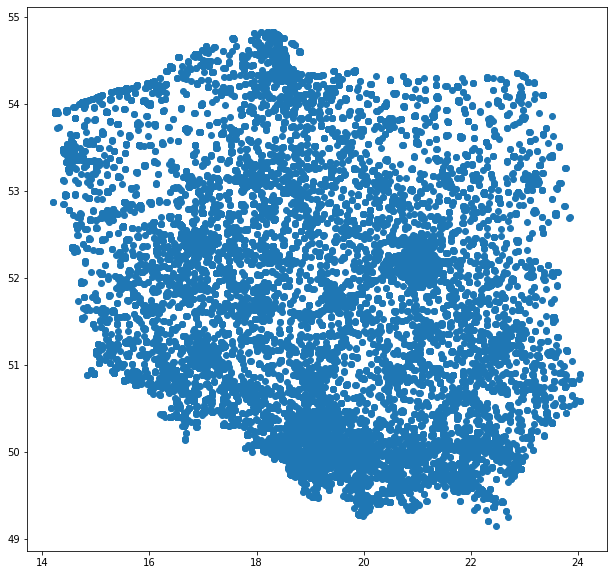

In [32]:
df.plot(figsize=(20,10))
plt.show()

In [28]:
pov = gpd.read_file("../datasets/raw_data/guigk_pov/Powiaty.shx", encoding='utf-8')
pov = pov.loc[pov.JPT_NAZWA_.isin(["powiat Warszawa", "powiat Kraków", "powiat Poznań"])==True, ("JPT_NAZWA_", "geometry")]
pov = pov.to_crs("epsg:4258")

In [39]:
grids = gpd.read_file("../datasets/raw_data/inspire/PD_STAT_GRID_CELL_2011.shp", encoding='utf-8')
grids = grids[['TOT', 'TOT_0_14', 'TOT_15_64', 'TOT_65__', 'TOT_MALE', 'TOT_FEM',
       'MALE_0_14', 'MALE_15_64', 'MALE_65__', 'FEM_0_14', 'FEM_15_64',
       'FEM_65__', 'FEM_RATIO', 'geometry']]
grids = grids.to_crs("epsg:4258")

In [41]:
pov_grids = gpd.sjoin(grids, pov, how="inner", op="within")

In [44]:
pov_grids[pov_grids.JPT_NAZWA_ == 'powiat Warszawa']

,TOT,TOT_0_14,TOT_15_64,TOT_65__,TOT_MALE,TOT_FEM,MALE_0_14,MALE_15_64,MALE_65__,FEM_0_14,FEM_15_64,FEM_65__,FEM_RATIO,geometry,index_right,JPT_NAZWA_
207094,5917,1245,3876,796,2740,3177,614,1790,336,631,2086,460,115.948905,"POLYGON ((20.86843 52.19441, 20.85395 52.19574...",296,powiat Warszawa
207149,888,124,652,112,427,461,61,323,43,63,329,69,107.962529,"POLYGON ((20.89251 52.29199, 20.87799 52.29333...",296,powiat Warszawa
207150,204,24,137,43,94,110,13,67,14,11,70,29,117.021277,"POLYGON ((20.89470 52.30086, 20.88018 52.30220...",296,powiat Warszawa
207573,1869,236,1210,423,838,1031,111,572,155,125,638,268,123.031026,"POLYGON ((20.89824 52.25516, 20.88374 52.25650...",296,powiat Warszawa
207627,7448,999,5568,881,3609,3839,524,2699,386,475,2869,495,106.372956,"POLYGON ((20.88292 52.19307, 20.86843 52.19441...",296,powiat Warszawa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221330,4251,999,2934,318,2034,2217,514,1384,136,485,1550,182,108.997050,"POLYGON ((21.24386 52.21360, 21.22938 52.21498...",296,powiat Warszawa
221622,167,40,113,14,77,90,22,50,5,18,63,9,116.883117,"POLYGON ((21.24930 52.17676, 21.23483 52.17815...",296,powiat Warszawa
221741,358,113,220,25,168,190,58,101,9,55,119,16,113.095238,"POLYGON ((21.24479 52.15904, 21.23032 52.16042...",296,powiat Warszawa
221871,327,62,237,28,154,173,37,106,11,25,131,17,112.337662,"POLYGON ((21.24704 52.16790, 21.23258 52.16928...",296,powiat Warszawa
